# Cascade R-CNN Demo

This is a [Cascade R-CNN](https://arxiv.org/abs/1712.00726) colab notebook using the open source project [open-mmlab/mmdetection](https://github.com/open-mmlab/mmdetection) (Open MMLab Detection Toolbox).


For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).

Updated by [Kevin](https://github.com/loveunk) on 11/28/2019:
- revise the code to support the latest mmdetection


## Install Open MMLab Detection Toolbox

In [ ]:
#@title
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/open-mmlab/mmdetection.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone
  !git clone -q --depth 1 $git_repo_url
  # dependencies
  !pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
  !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.6/index.html
  !pip install -q terminaltables imagecorruptions
  # build
  !cd {project_name} && python setup.py develop
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Prepare model

According to [MODEL_ZOO.md#cascade-r-cnn](https://github.com/open-mmlab/mmdetection/tree/master/configs/cascade_rcnn#cascade-r-cnn-1), the Cascade R-CNN model `x101_64x4d_fpn_1x` has a Box mAP 44.6 on the COCO dataset. We will use it: 

In [2]:
#@title
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

config_file = join(project_name, 'configs/cascade_rcnn/cascade_rcnn_x101_64x4d_fpn_1x_coco.py')
checkpoint_file = 'https://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_x101_64x4d_fpn_1x_coco/cascade_rcnn_x101_64x4d_fpn_1x_coco_20200515_075702-43ce6a30.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_x101_64x4d_fpn_1x_coco/cascade_rcnn_x101_64x4d_fpn_1x_coco_20200515_075702-43ce6a30.pth


Downloading: "https://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_x101_64x4d_fpn_1x_coco/cascade_rcnn_x101_64x4d_fpn_1x_coco_20200515_075702-43ce6a30.pth" to /root/.cache/torch/checkpoints/cascade_rcnn_x101_64x4d_fpn_1x_coco_20200515_075702-43ce6a30.pth


  0%|          | 0.00/486M [00:00<?, ?B/s]

## Evaluate on a test image

First, download a test image from the internet:

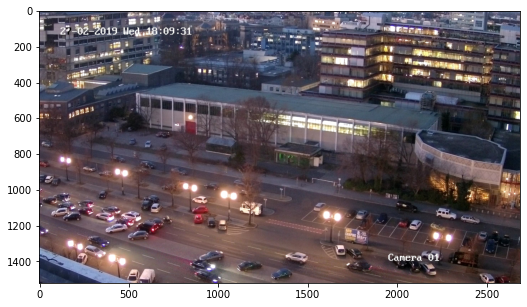

In [3]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/traffic_camera.jpg'

image_file = basename(IMAGE_URL)
!wget -q -O $image_file $IMAGE_URL

import cv2
plt.figure(figsize=(10, 5))
plt.imshow(cv2.imread(image_file)[:,:,::-1])

Now evaluate the Cascade RCNN on the downloaded image and visualize the result:

mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


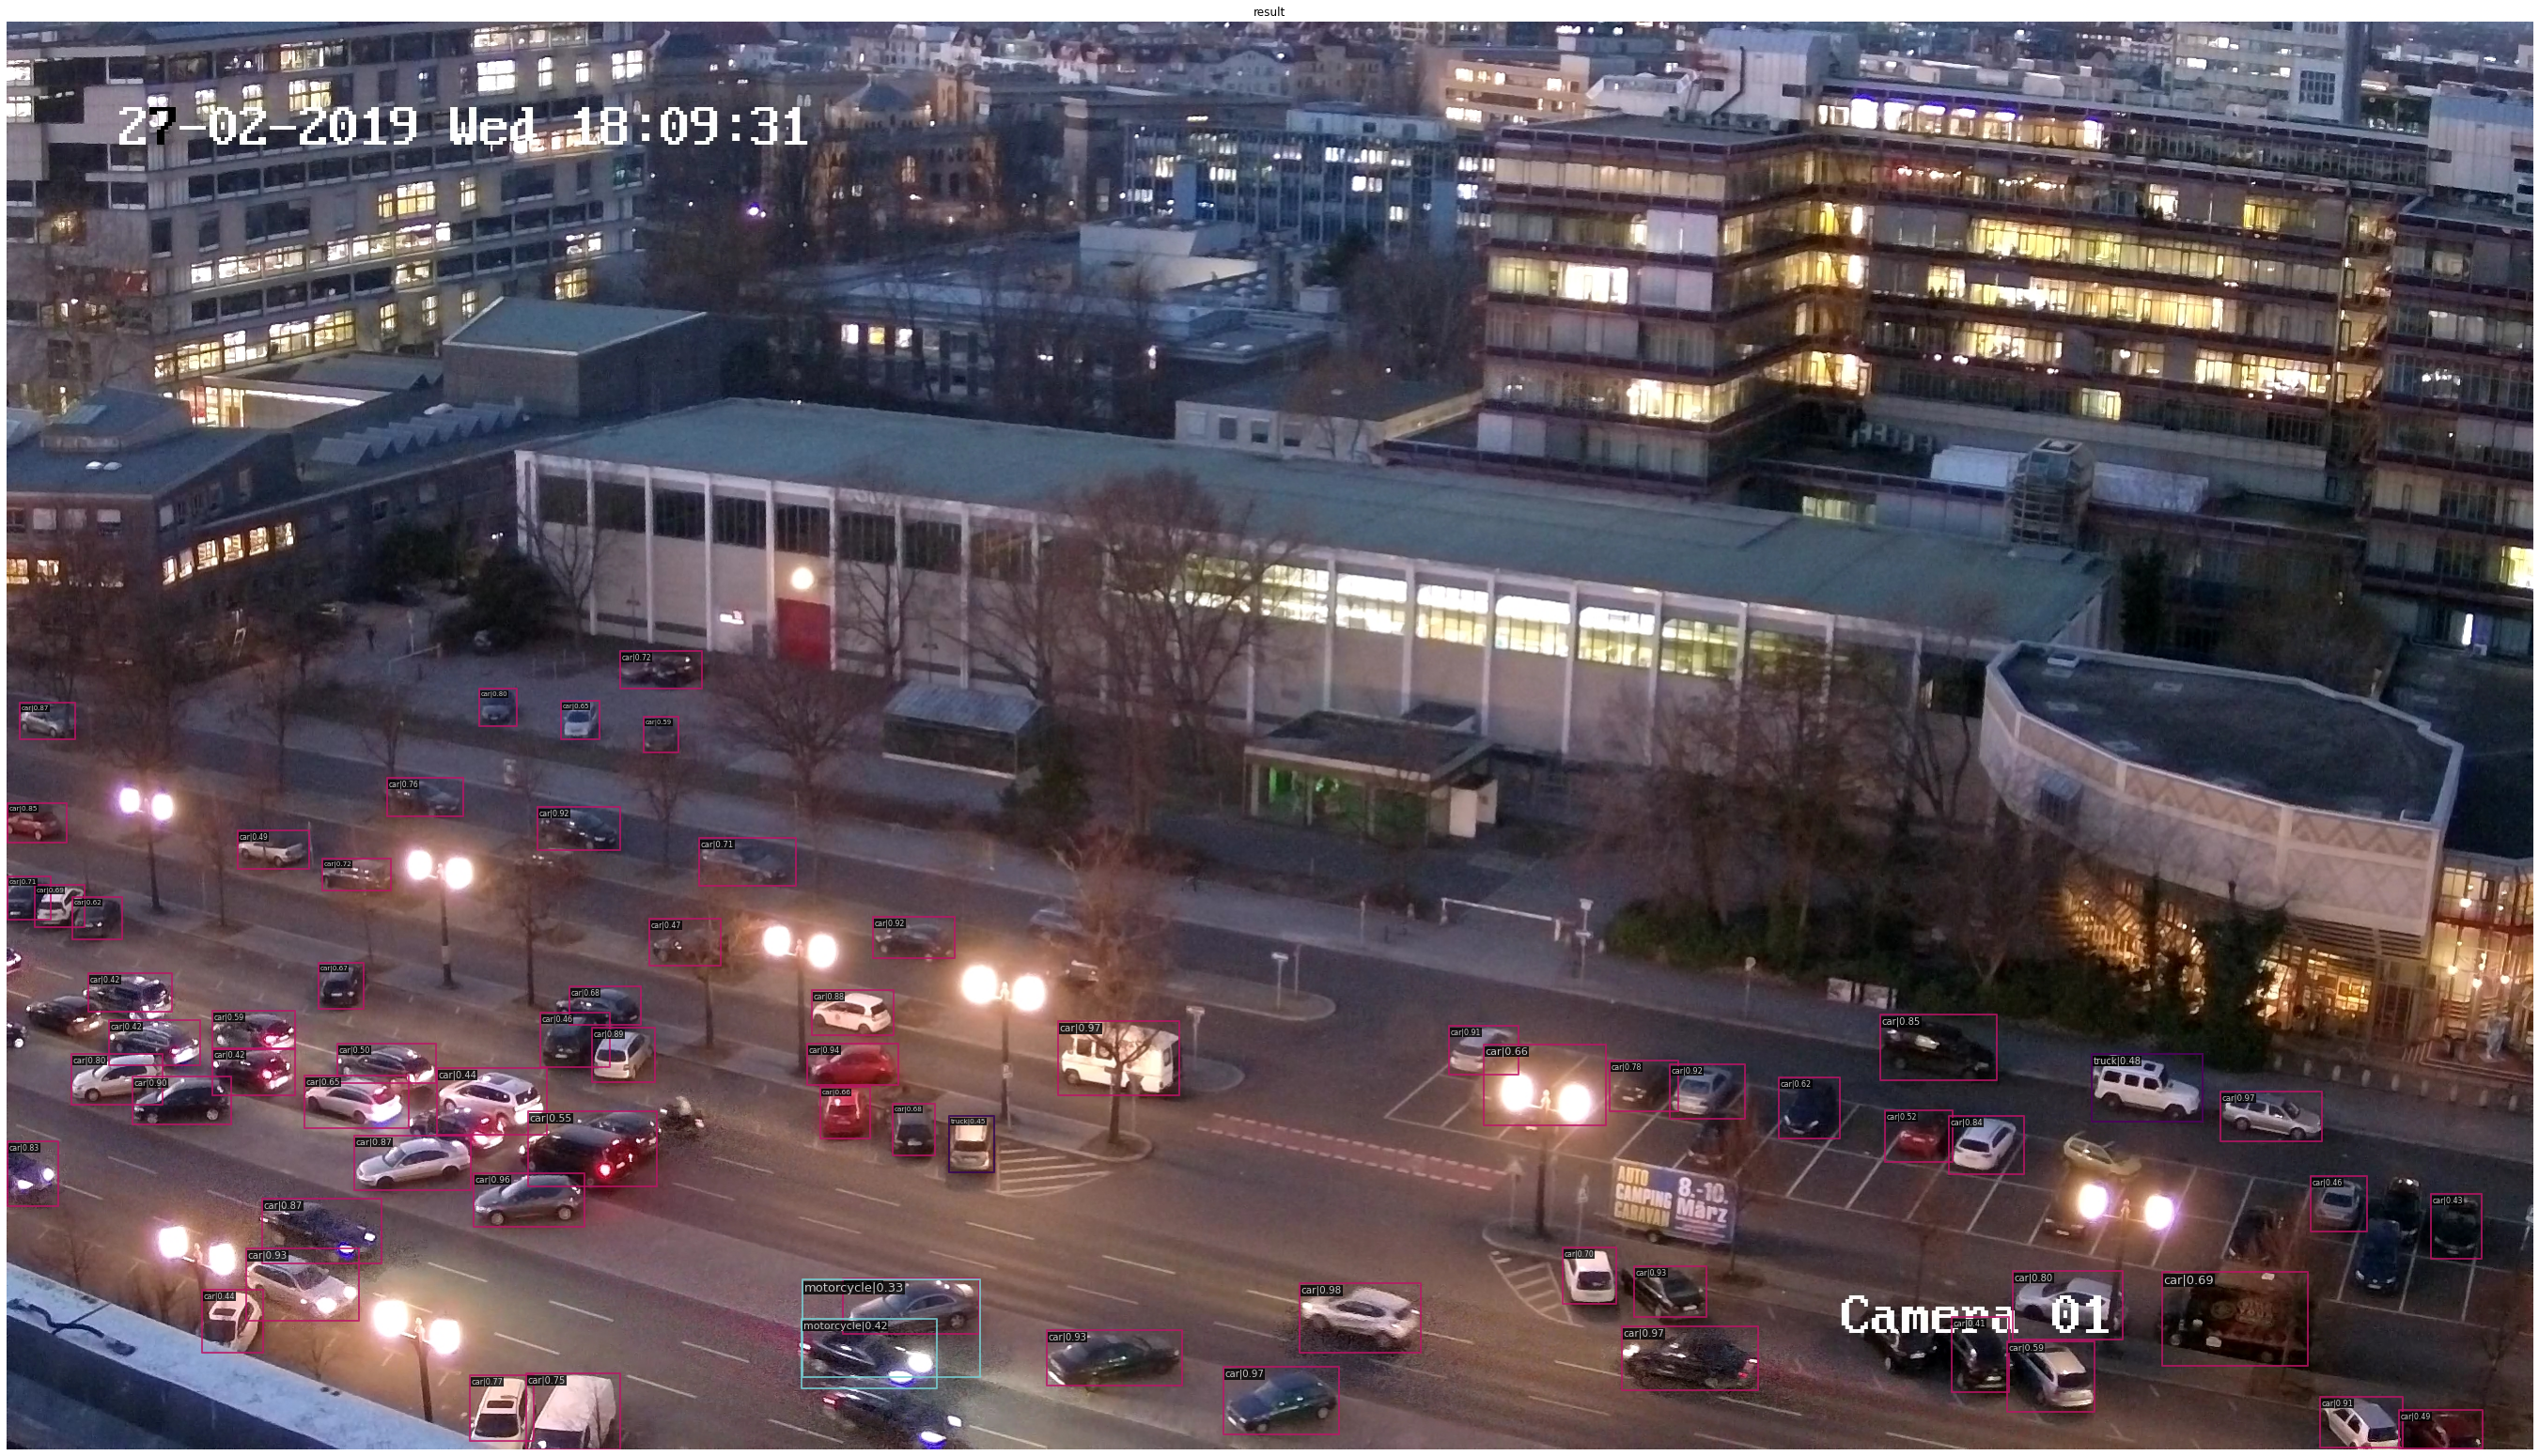

In [4]:
img = mmcv.imread(image_file)
result = inference_detector(model, [img])
show_result_pyplot(model, img, result[0])